In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [ ]:
run_id = 'BP_2Predictors_live_training_Horizon30'

In [ ]:
os.mkdir(run_id)

In [ ]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [2]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

#### Prophet and Neural prophet training set-up

In [ ]:
#training_data = DataLoader('BP', '2010-02-01', '2018-02-01')
#training_data = training_data.get_adjclose()

#### Normal set-up

In [3]:
predict = DataLoader('BP', '2018-02-02', '2018-05-01')
predict = predict.get_adjclose()

In [4]:
predict_req, real = data_prep(predict, 20, 30) # dividing data into predictor input and real data

### Individual predictor forecasts

In [17]:
individual_predictors_forecasts = individual_predictors_pretrained_BP_30_3(predict_req, 30)

In [ ]:
#individual_predictors_forecasts = individual_predictors_template2(training_data, 30)

### System disagreement between individual predictor forecasts

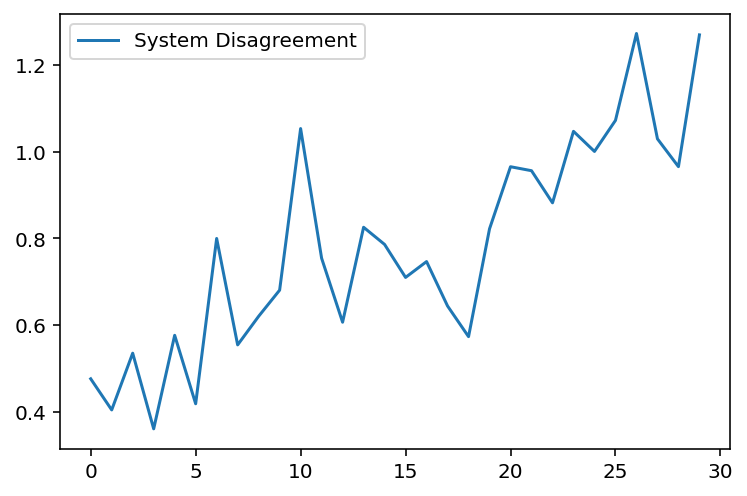

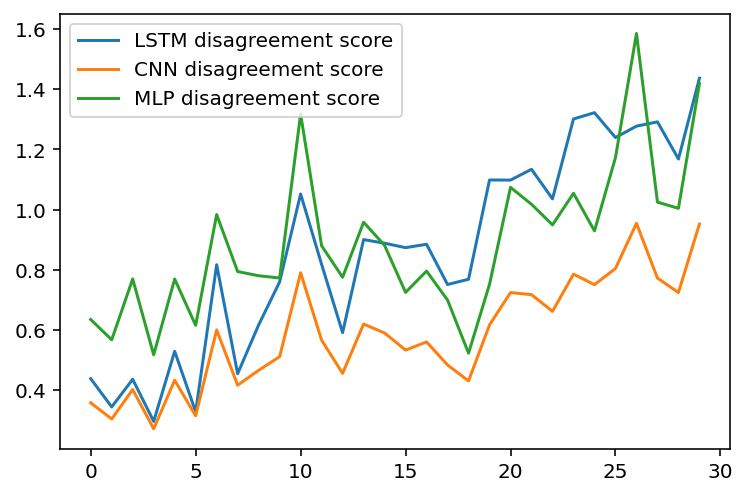

In [18]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [19]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

#### Only using correcting consensus algorithm:

In [20]:
#consensus_forecasts = consensus_optimal(individual_predictors_forecasts, real)

In [21]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [22]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Correcting,Real Value,LSTM,CNN,MLP,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score
Date,,,,,,,,,
2018-03-05,31.957194,31.924553,31.519371,31.760506,32.591705,0.476593,0.437823,0.357445,0.634511
2018-03-06,31.948444,32.242489,31.636442,31.757072,32.547344,0.404845,0.343844,0.303634,0.567058
2018-03-07,32.114873,32.046844,31.419725,31.521929,32.624828,0.535601,0.435769,0.401701,0.769334
2018-03-08,32.103668,32.169121,31.613255,31.687441,32.426117,0.361272,0.295683,0.270954,0.517179
2018-03-09,31.966201,32.332169,31.181055,31.469465,32.478863,0.576803,0.528739,0.432603,0.769068
2018-03-12,32.402068,32.487061,31.448248,31.488953,32.391087,0.419039,0.327848,0.314280,0.614991
2018-03-13,32.180351,32.242489,30.663185,31.312935,32.463337,0.800067,0.816634,0.600051,0.983518
2018-03-14,32.454535,31.688131,31.227610,31.342339,32.475788,0.554746,0.454302,0.416059,0.793876
2018-03-15,31.538207,31.818569,30.915678,31.368473,32.312157,0.620657,0.616425,0.465493,0.780054


In [ ]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [23]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,Correcting absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,System Disagreement
Date,,,,,,,,
2018-03-05,0.405182,0.164047,0.667152,0.032641,0.437823,0.357445,0.634511,0.476593
2018-03-06,0.606047,0.485416,0.304855,0.294045,0.343844,0.303634,0.567058,0.404845
2018-03-07,0.627119,0.524916,0.577984,0.068028,0.435769,0.401701,0.769334,0.535601
2018-03-08,0.555866,0.481680,0.256996,0.065453,0.295683,0.270954,0.517179,0.361272
2018-03-09,1.151114,0.862703,0.146694,0.365968,0.528739,0.432603,0.769068,0.576803
2018-03-12,1.038813,0.998108,0.095974,0.084992,0.327848,0.314280,0.614991,0.419039
2018-03-13,1.579304,0.929554,0.220848,0.062138,0.816634,0.600051,0.983518,0.800067
2018-03-14,0.460522,0.345793,0.787657,0.766404,0.454302,0.416059,0.793876,0.554746
2018-03-15,0.902891,0.450096,0.493587,0.280362,0.616425,0.465493,0.780054,0.620657


In [ ]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,Correcting absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,System Disagreement
LSTM absolute error,1.000000,0.986546,0.942621,-0.006108,0.884761,0.825593,0.638411,0.825593
CNN absolute error,0.986546,1.000000,0.945150,-0.038785,0.813069,0.780435,0.634510,0.780435
MLP absolute error,0.942621,0.945150,1.000000,-0.009331,0.797568,0.754487,0.598060,0.754487
Correcting absolute error,-0.006108,-0.038785,-0.009331,1.000000,0.038367,-0.016890,-0.088239,-0.016890
LSTM disagreement score,0.884761,0.813069,0.797568,0.038367,1.000000,0.958113,0.776538,0.958113
CNN disagreement score,0.825593,0.780435,0.754487,-0.016890,0.958113,1.000000,0.924457,1.000000
MLP disagreement score,0.638411,0.634510,0.598060,-0.088239,0.776538,0.924457,1.000000,0.924457
System Disagreement,0.825593,0.780435,0.754487,-0.016890,0.958113,1.000000,0.924457,1.000000


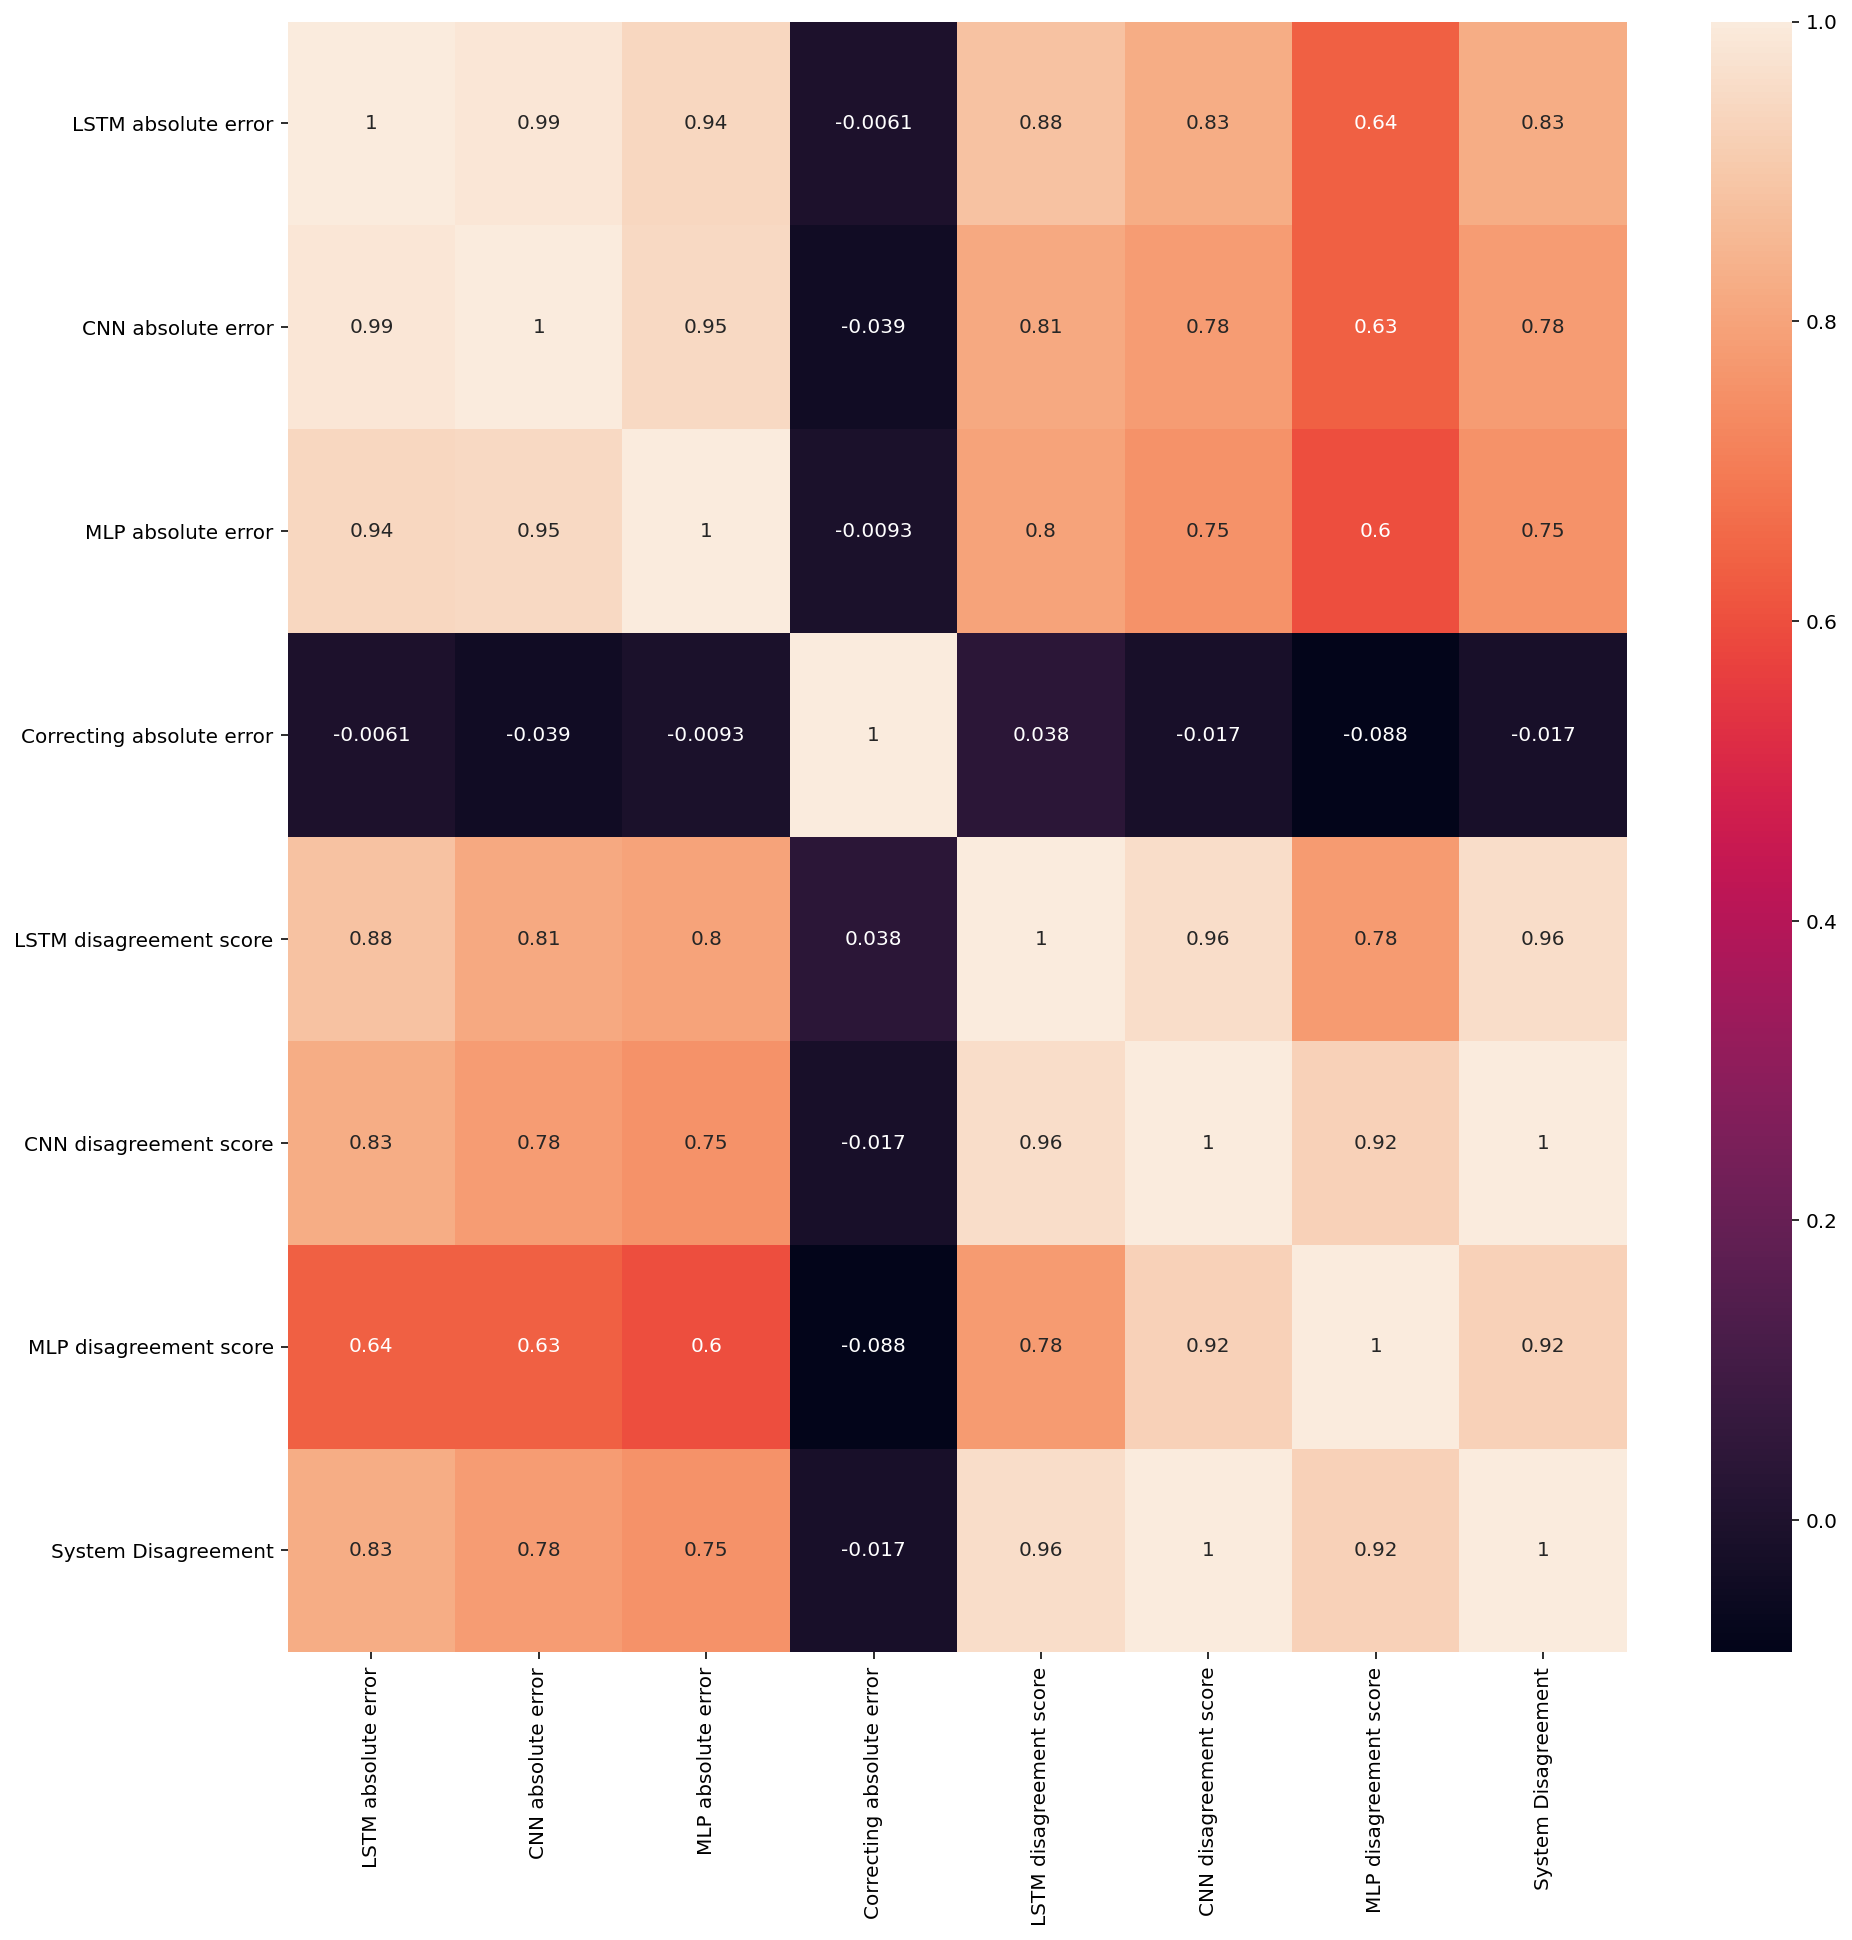

In [24]:
correlation_ = correlation(prediction_error, True)
correlation_

In [ ]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MSE,  MSE log and MAE scores

,Algorithms,MSE
0,Correcting,0.281694
1,LSTM,11.273420
2,CNN,5.967228
3,MLP,3.259404


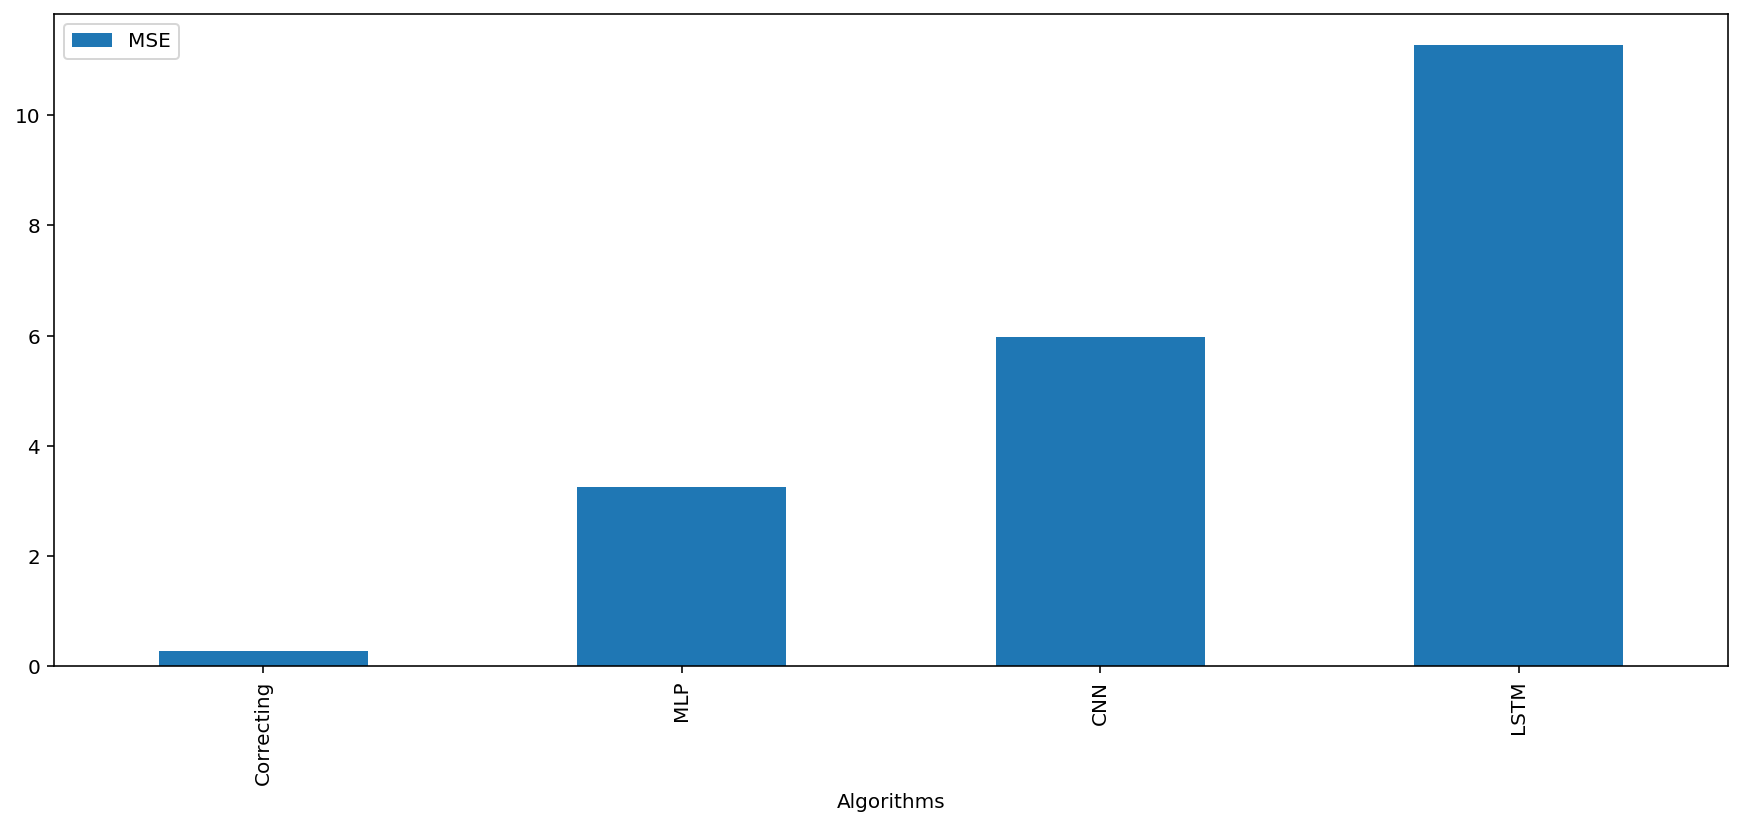

In [25]:
mse = mse_score(all_forecasts, True)
mse

In [ ]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Correcting,0.000250
1,LSTM,0.010552
2,CNN,0.005346
3,MLP,0.002833


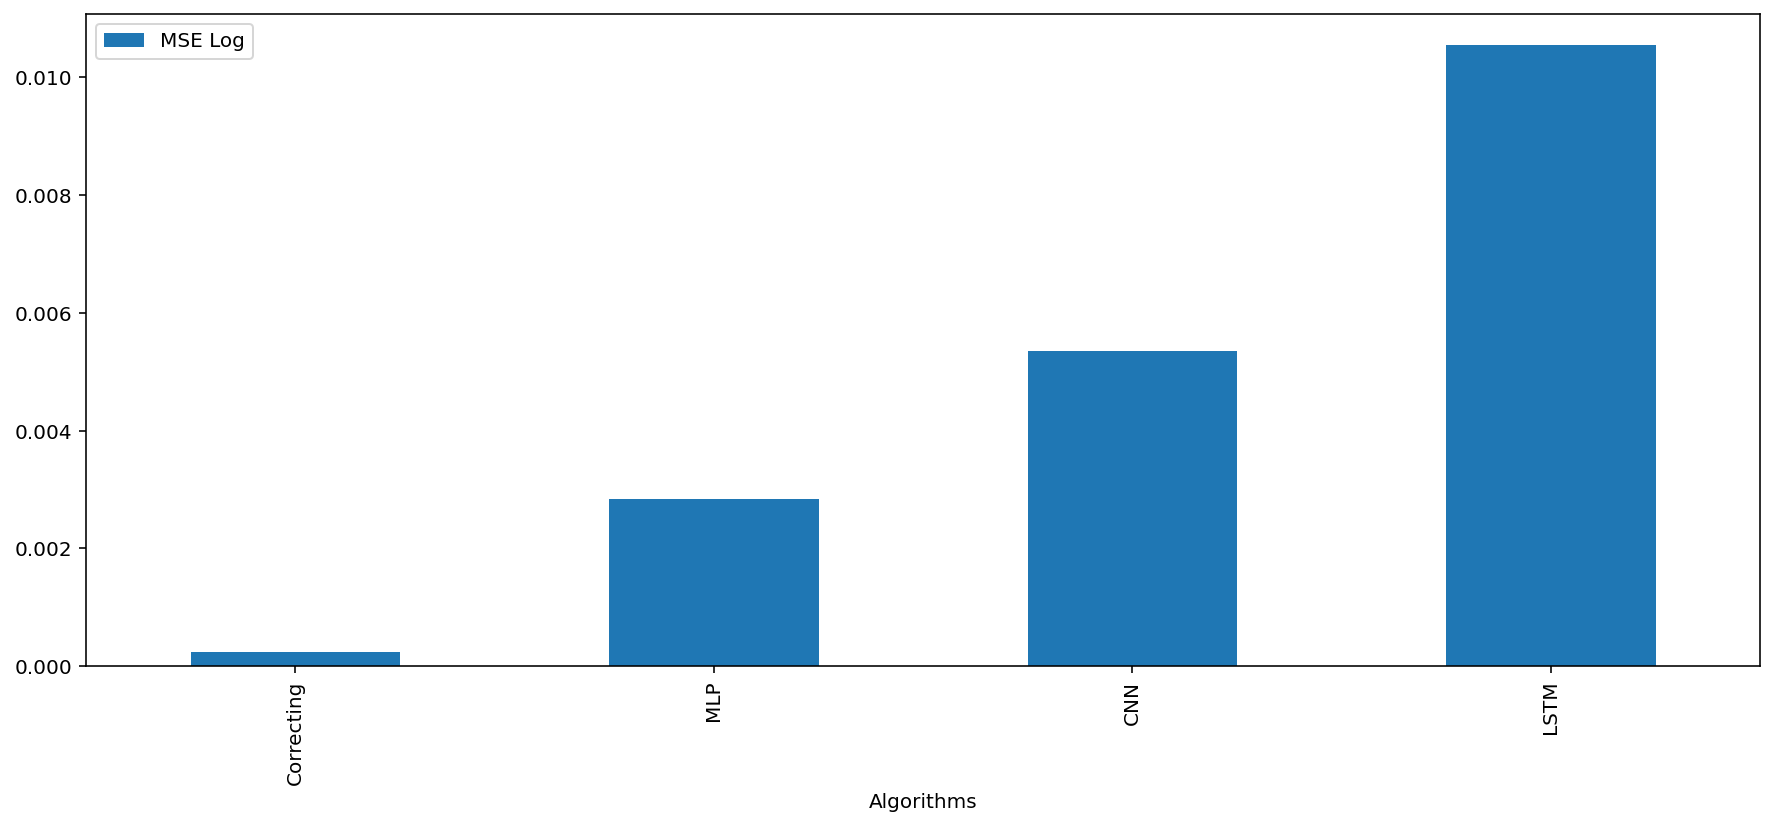

In [26]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [ ]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Correcting,0.417737
1,LSTM,2.750965
2,CNN,1.912448
3,MLP,1.352358


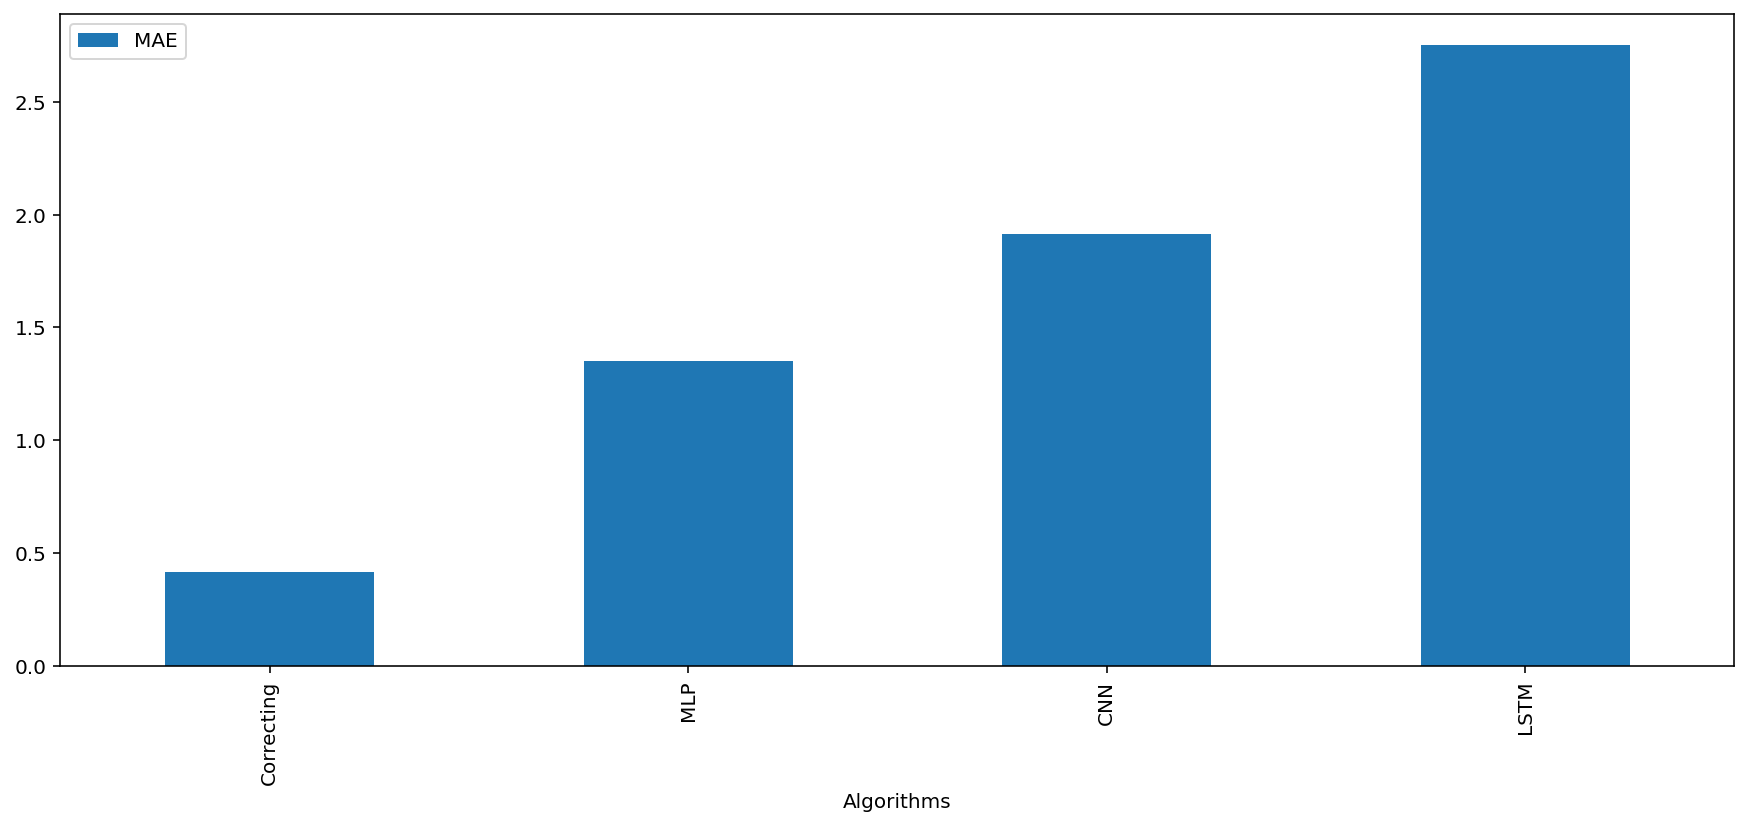

In [27]:
mae = mae_score(all_forecasts, True)
mae

In [ ]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

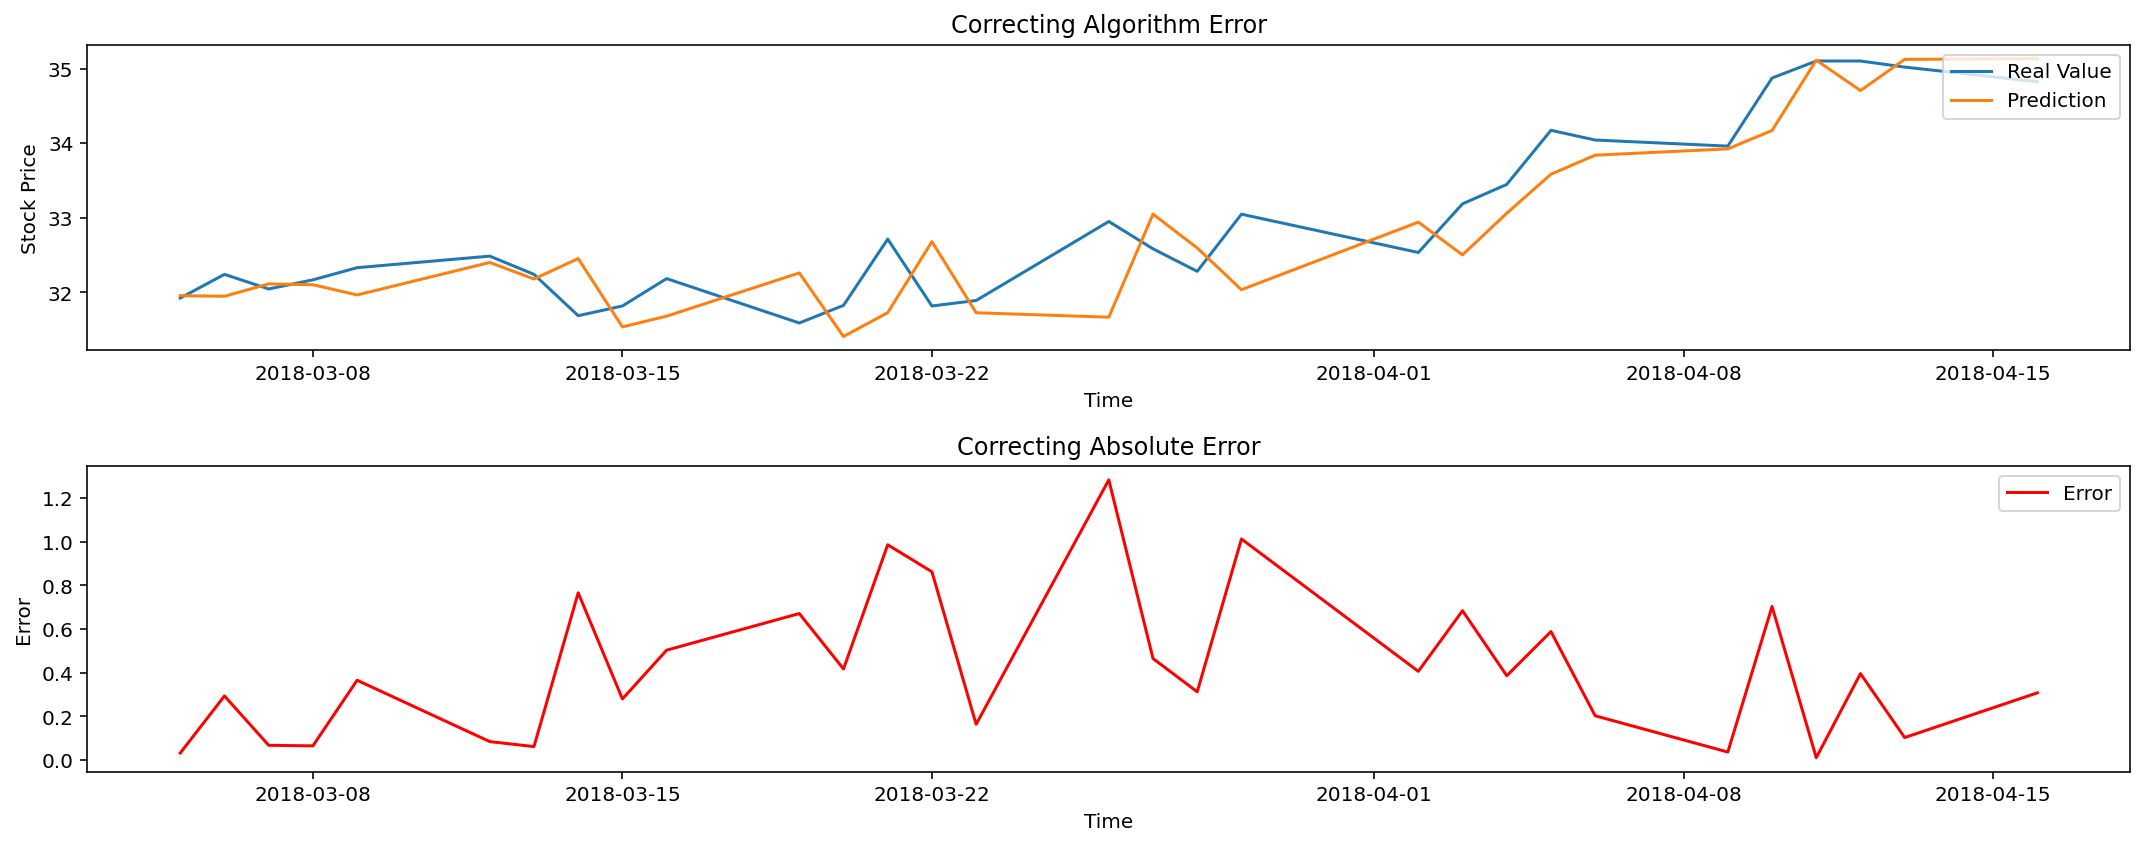

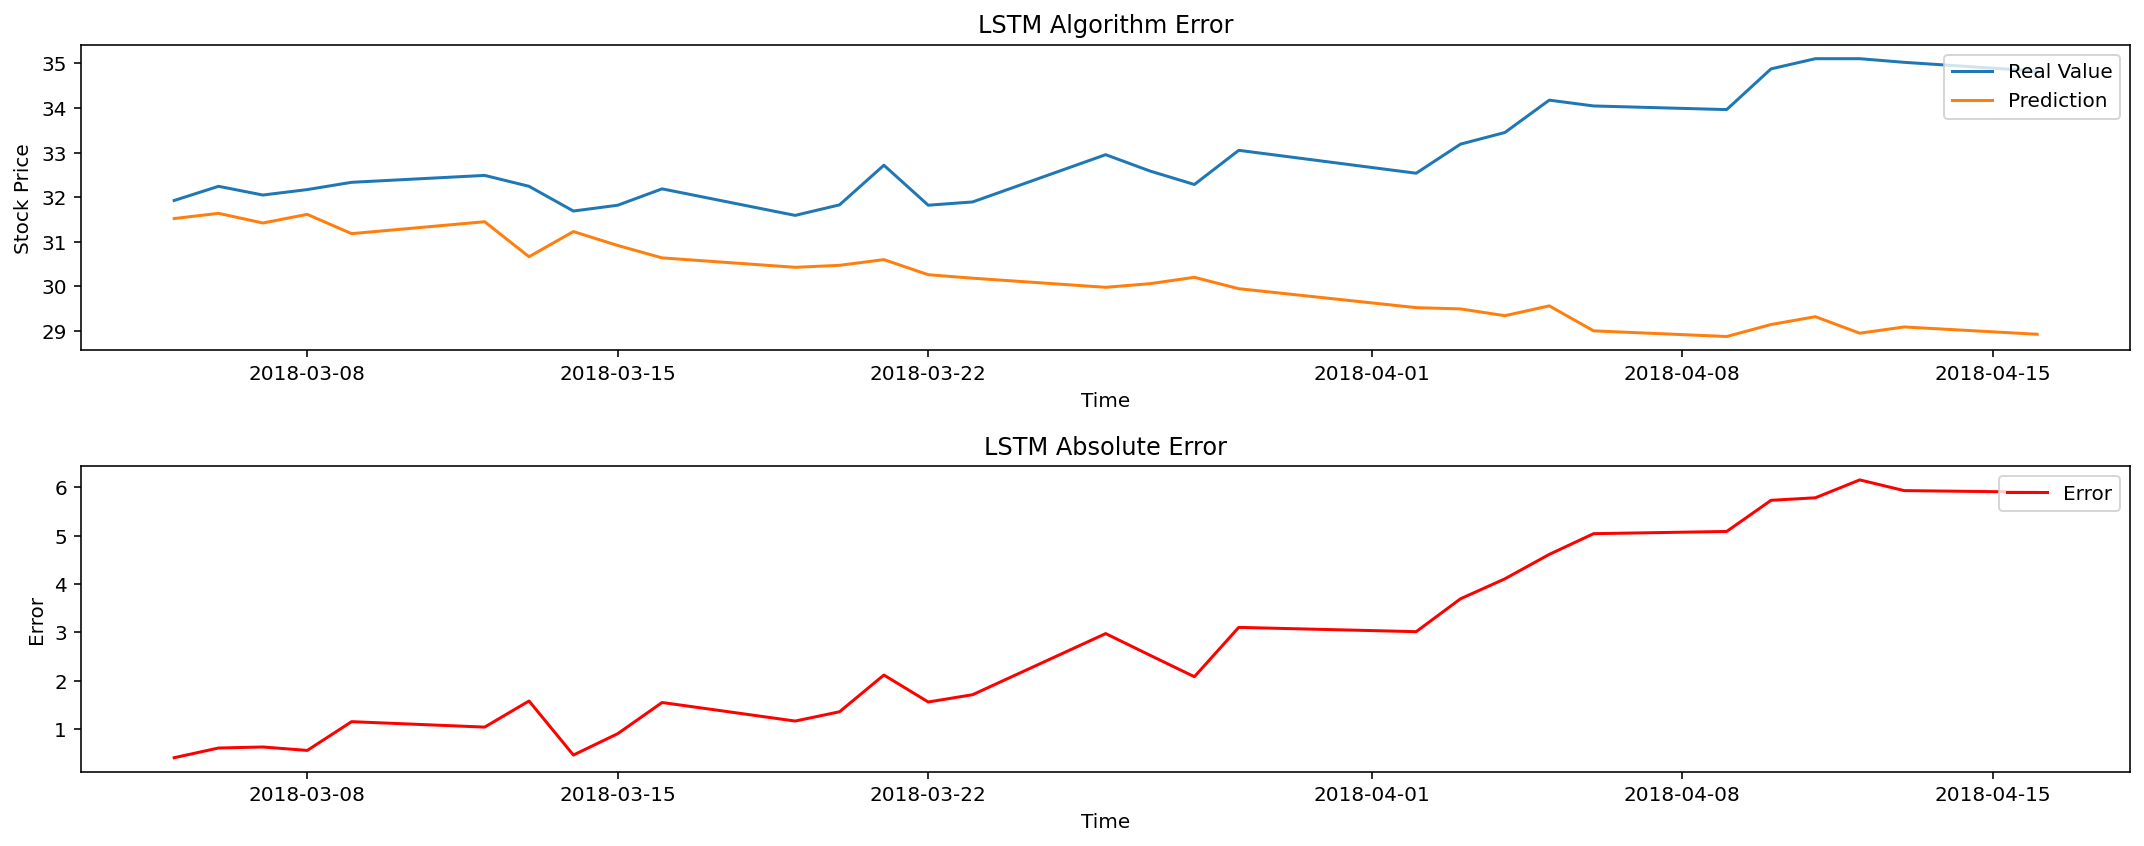

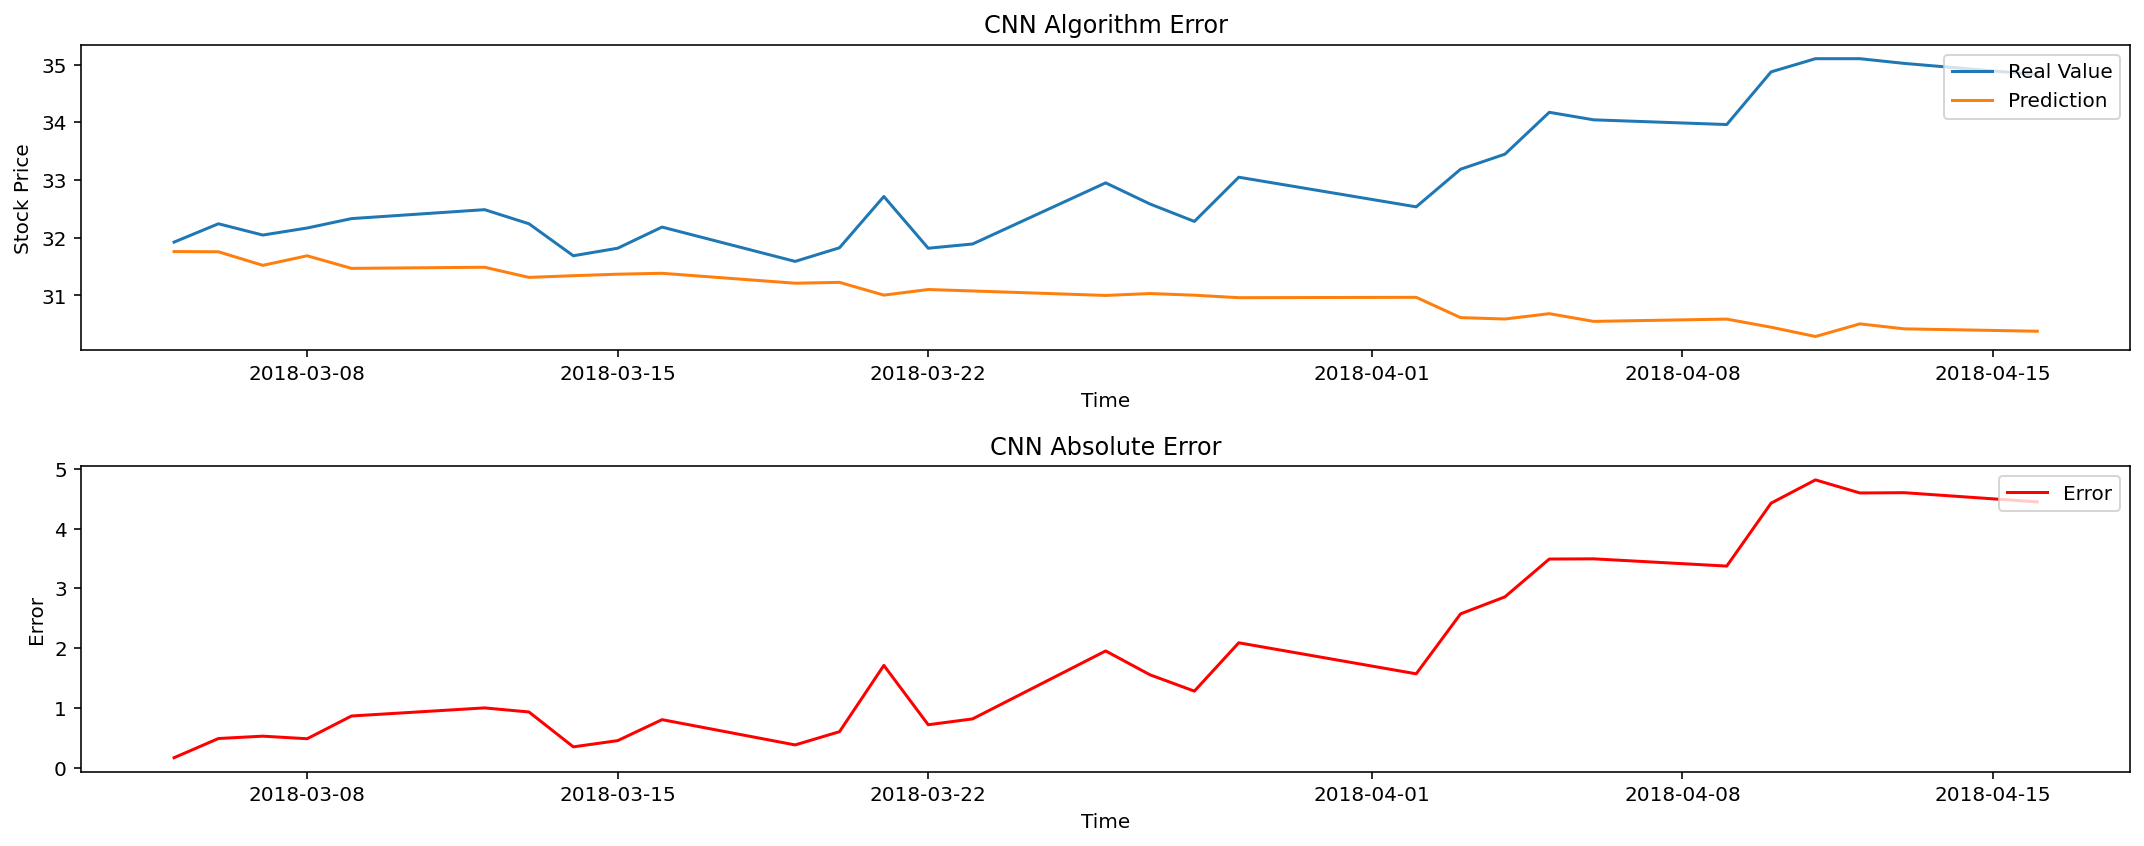

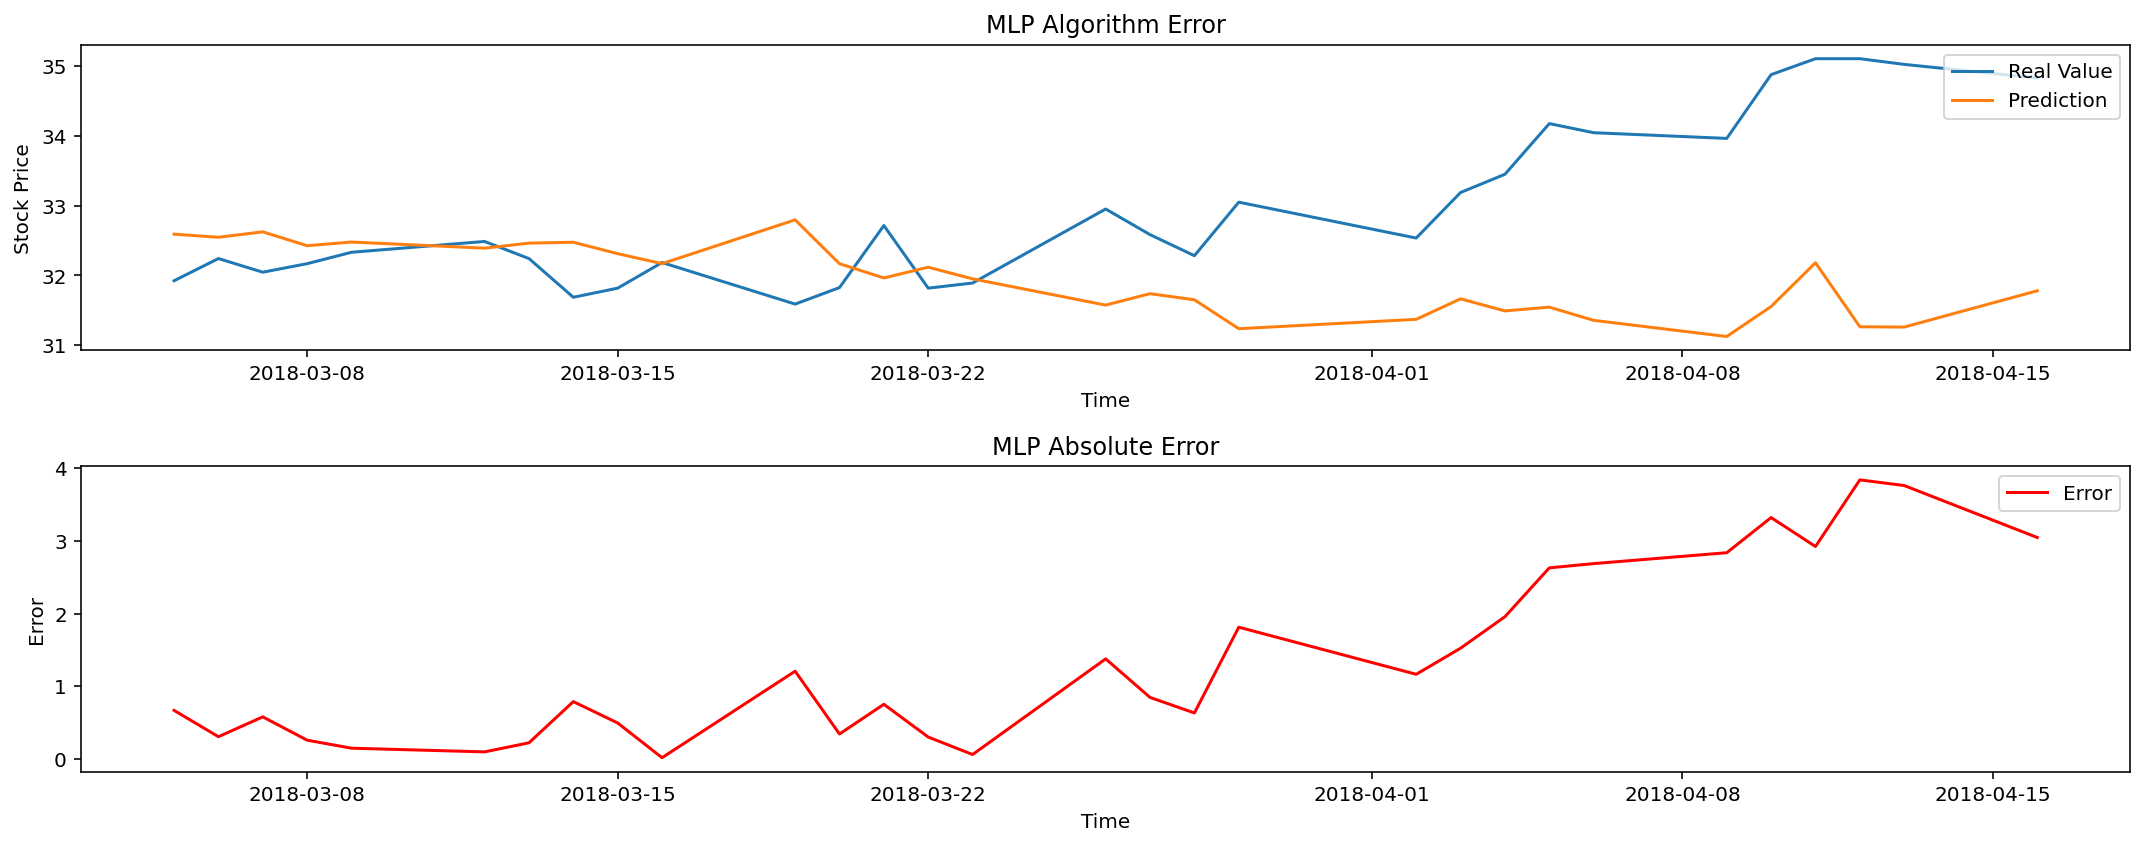

In [28]:
plot_performance(all_forecasts)